In [1]:
import gpflow
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
met_data = pd.read_csv(r'D:\AirQo\Nsabagwa_data\Jinja temp and rh.csv', parse_dates=['created_at'], usecols=['created_at', 'temp', 'rh'])
met_data.head()

,created_at,temp,rh
0,2018-12-12 17:08:29,NaN,NaN
1,2018-12-12 17:53:26,24.83,65.35
2,2018-12-12 17:54:26,24.76,65.78
3,2018-12-12 17:55:26,24.82,65.96
4,2018-12-12 17:56:26,24.79,65.96


In [3]:
#met_data['created_at'] = pd.to_datetime(met_data['created_at'])

In [4]:
#convert to datetime
count =0
for i in range(met_data.shape[0]):
    try:
        met_data['created_at'].iloc[i] = pd.to_datetime(met_data['created_at'].iloc[i])
    except:
        met_data['created_at'].iloc[i] = None
        count+=1
met_data.info()

c:\users\user\anaconda3\envs\gaussian_env\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170759 entries, 0 to 170758
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   created_at  167522 non-null  object 
 1   temp        166241 non-null  float64
 2   rh          164445 non-null  float64
dtypes: float64(2), object(1)
memory usage: 3.9+ MB


In [5]:
type(met_data['created_at'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
met_data.isna().sum()

created_at    3237
temp          4518
rh            6314
dtype: int64

In [7]:
met_data.shape

(170759, 3)

In [8]:
met_data.dropna(inplace=True)
met_data.shape

(161133, 3)

In [9]:
from datetime import datetime
met_data['created_at'] = met_data['created_at'].dt.tz_localize('Africa/Kampala')
met_data.head()

,created_at,temp,rh
1,2018-12-12 17:53:26+03:00,24.83,65.35
2,2018-12-12 17:54:26+03:00,24.76,65.78
3,2018-12-12 17:55:26+03:00,24.82,65.96
4,2018-12-12 17:56:26+03:00,24.79,65.96
5,2018-12-12 17:57:26+03:00,24.68,66.50


In [10]:
met_data.set_index('created_at', inplace=True)
met_data.head()

,temp,rh
created_at,,
2018-12-12 17:53:26+03:00,24.83,65.35
2018-12-12 17:54:26+03:00,24.76,65.78
2018-12-12 17:55:26+03:00,24.82,65.96
2018-12-12 17:56:26+03:00,24.79,65.96
2018-12-12 17:57:26+03:00,24.68,66.50


In [11]:
hourly_met_data=met_data.resample('H').mean()
hourly_met_data.head()

,temp,rh
created_at,,
2018-12-12 17:00:00+03:00,24.722857,66.110000
2018-12-12 18:00:00+03:00,23.796111,70.460556
2018-12-12 19:00:00+03:00,22.016415,81.835283
2018-12-12 20:00:00+03:00,21.144038,86.566731
2018-12-12 21:00:00+03:00,20.555098,90.146078


### Air Quality data

In [12]:
aq_data = pd.read_csv(r'D:\AirQo\Feeds\02-09-19\AQ_23.csv', parse_dates = ['created_at'], usecols=['created_at', 'field1', 'field5', 'field6'])
aq_data.head()

c:\users\user\anaconda3\envs\gaussian_env\lib\site-packages\dateutil\parser\_parser.py:1218: UnknownTimezoneWarning: tzname EAT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


,created_at,field1,field5,field6
0,2019-01-29 22:38:29,61.38,0.357651,32.584480
1,2019-01-29 22:39:44,66.13,0.357649,32.584503
2,2019-01-29 22:42:06,60.47,0.357668,32.584484
3,2019-01-29 22:43:31,52.30,0.357642,32.584492
4,2019-01-29 22:46:55,52.47,0.357648,32.584511


In [14]:
aq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75027 entries, 0 to 75026
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  75027 non-null  datetime64[ns]
 1   field1      75027 non-null  float64       
 2   field5      75027 non-null  float64       
 3   field6      75027 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.3 MB


In [15]:
aq_data['created_at'] = aq_data['created_at'].dt.tz_localize('Africa/Kampala')
aq_data.head()

,created_at,field1,field5,field6
0,2019-01-29 22:38:29+03:00,61.38,0.357651,32.584480
1,2019-01-29 22:39:44+03:00,66.13,0.357649,32.584503
2,2019-01-29 22:42:06+03:00,60.47,0.357668,32.584484
3,2019-01-29 22:43:31+03:00,52.30,0.357642,32.584492
4,2019-01-29 22:46:55+03:00,52.47,0.357648,32.584511


In [16]:
aq_data.set_index('created_at', inplace=True)
aq_data.head()

,field1,field5,field6
created_at,,,
2019-01-29 22:38:29+03:00,61.38,0.357651,32.584480
2019-01-29 22:39:44+03:00,66.13,0.357649,32.584503
2019-01-29 22:42:06+03:00,60.47,0.357668,32.584484
2019-01-29 22:43:31+03:00,52.30,0.357642,32.584492
2019-01-29 22:46:55+03:00,52.47,0.357648,32.584511


In [17]:
hourly_aq_data=aq_data.resample('H').mean()
hourly_aq_data.head()

,field1,field5,field6
created_at,,,
2019-01-29 22:00:00+03:00,62.519091,0.357667,32.584482
2019-01-29 23:00:00+03:00,65.356304,0.357683,32.584476
2019-01-30 00:00:00+03:00,60.043333,0.357663,32.584441
2019-01-30 01:00:00+03:00,60.221429,0.357671,32.584497
2019-01-30 02:00:00+03:00,52.700000,0.357658,32.584465


In [18]:
hourly_aq_data.columns = ['pm25', 'lat', 'long']
hourly_aq_data.head()

,pm25,lat,long
created_at,,,
2019-01-29 22:00:00+03:00,62.519091,0.357667,32.584482
2019-01-29 23:00:00+03:00,65.356304,0.357683,32.584476
2019-01-30 00:00:00+03:00,60.043333,0.357663,32.584441
2019-01-30 01:00:00+03:00,60.221429,0.357671,32.584497
2019-01-30 02:00:00+03:00,52.700000,0.357658,32.584465


### Combining into one df

In [19]:
def merge_dfs(df_list):
    '''
    Merges several dataframes into one based on the index
    '''
    from functools import reduce
    final_df = reduce(lambda left,right: pd.merge(left,right,on='created_at'), df_list)
    return final_df

In [20]:
hourly_aq_data.loc['2019-01-29 22:00:00+03:00']

pm25    62.519091
lat      0.357667
long    32.584482
Name: 2019-01-29 22:00:00+03:00, dtype: float64

In [21]:
merged_data = merge_dfs([hourly_aq_data, hourly_met_data ])
merged_data.head()

,pm25,lat,long,temp,rh
created_at,,,,,
2019-01-29 22:00:00+03:00,62.519091,0.357667,32.584482,22.447692,85.615577
2019-01-29 23:00:00+03:00,65.356304,0.357683,32.584476,21.425091,89.715273
2019-01-30 00:00:00+03:00,60.043333,0.357663,32.584441,20.848200,92.207200
2019-01-30 01:00:00+03:00,60.221429,0.357671,32.584497,19.884444,95.231481
2019-01-30 02:00:00+03:00,52.700000,0.357658,32.584465,18.910204,97.522041


In [22]:
merged_data.shape

(5180, 5)

In [23]:
merged_data.isna().sum()

pm25    1604
lat     1604
long    1604
temp    1238
rh      1238
dtype: int64

In [24]:
merged_data.dropna(inplace=True)
merged_data.isna().sum()

pm25    0
lat     0
long    0
temp    0
rh      0
dtype: int64

### GP Datasets

In [25]:
merged_np_data = merged_data.to_numpy()
merged_np_data[:1, :]

array([[62.51909091,  0.35766736, 32.58448164, 22.44769231, 85.61557692]])

In [26]:
Y= merged_np_data[:, 0]
Y

array([62.51909091, 65.35630435, 60.04333333, ..., 29.64511111,
       33.40022222, 36.62227273])

In [27]:
X = merged_np_data[:, 1:5]
X

array([[ 0.35766736, 32.58448164, 22.44769231, 85.61557692],
       [ 0.35768322, 32.5844755 , 21.42509091, 89.71527273],
       [ 0.35766333, 32.584441  , 20.8482    , 92.2072    ],
       ...,
       [ 0.43077229, 33.2105362 , 28.20153846, 63.49730769],
       [ 0.43078309, 33.21048002, 25.70222222, 69.70222222],
       [ 0.43080409, 33.21049773, 23.16533333, 80.684     ]])

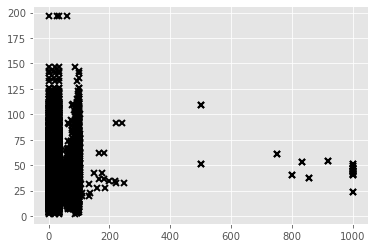

In [28]:
_ = plt.plot(X, Y, "kx", mew=2)

In [29]:
Xtraining = X[:4145, :]
Xtest = X[4145:, :]
Ytraining = Y[:4145]
Ytest = Y[4145:]

Xtraining1 = X[:300, :]
Xtest1 = X[300:400, :]
Ytraining1=Y[:300]
Ytest1=Y[300:400]

Xtraining2 = X[:10, :]
Xtest2 = X[10:20, :]
Ytraining2 = Y[:10]
Ytest2 = Y[10:20]

In [30]:
print(np.any(np.isnan(Xtraining))) #and gets False
print(np.all(np.isfinite(Xtraining))) #and gets True

False
True


### Scikit-learn GP Model

In [31]:
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [32]:
kernel = ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0)) * RBF(length_scale=0.5, length_scale_bounds=(0.0, 10.0)) + RBF(length_scale=2.0, length_scale_bounds=(0.0, 10.0))
#kernel = DotProduct() + WhiteKernel()

In [33]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(Xtraining1, Ytraining1)

c:\users\user\anaconda3\envs\gaussian_env\lib\site-packages\sklearn\gaussian_process\kernels.py:301: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))


In [34]:
gpr.score(Xtraining, Ytraining)

-0.0037580107065422474

In [35]:
sk_predictions = gpr.predict(Xtest1, return_std=True)

In [36]:
sk_predictions

(array([40.87835556, 34.95096586, 32.63740219, 29.46933702, 24.81667836,
        22.15471216, 14.3942628 , 11.7487226 , 22.74000761, 19.07776495,
        20.87135178, 24.35439245, 25.64679741, 32.29072445, 34.91754264,
        36.86472343, 40.58694702, 40.45928747, 41.42286658, 42.32685629,
        45.06475065, 45.79116087, 46.00781223, 56.08095125, 45.24181435,
        46.03137159, 43.90604491, 42.93443468, 42.11102171, 30.8420558 ,
        28.5994138 , 21.61351455, 19.85244775, 23.7803079 , 40.09511094,
        38.98594838, 43.28292413, 42.71997822, 43.09758766, 42.00688948,
        46.00568715, 45.46956583, 43.16215207, 41.28828464, 38.79194393,
        35.99946603, 34.45225228, 33.16389084, 33.1580696 , 34.94886531,
        45.32363381, 33.39269921, 22.68746303, 25.18384638, 23.70513349,
        28.64587577, 41.36207729, 37.20563912, 35.54308011, 36.20248333,
        37.9888888 , 43.3275249 , 44.30164806, 43.40371673, 36.57690174,
        43.21091759, 32.94685419, 29.90660388, 26.8

In [37]:
Ytest1

array([44.18882353, 32.34307692, 44.6896    , 35.7192    , 48.16258065,
       39.08571429, 33.24125   , 36.67222222, 32.75636364, 29.954     ,
       33.01785714, 30.48590909, 34.10875   , 35.31041667, 30.75545455,
       26.44464286, 33.17105263, 25.63317073, 22.58      , 17.60521739,
       27.97230769, 40.36272727, 38.56375   , 59.56368421, 73.834     ,
       66.09304348, 65.9568    , 57.99411765, 47.04363636, 47.17      ,
       41.73142857, 36.57857143, 36.39235294, 40.76238095, 45.64      ,
       93.03869565, 55.6815    , 37.3675    , 37.91666667, 27.75178571,
       29.1984    , 46.14208333, 48.0908    , 52.24346154, 50.2812    ,
       48.73269231, 59.3472    , 54.29911765, 79.92869565, 95.75074074,
       80.746     , 53.66625   , 40.365     , 43.454     , 42.385     ,
       45.69      , 45.83142857, 43.55222222, 36.91263158, 40.21833333,
       56.18347826, 62.62681818, 58.71      , 51.54307692, 82.92466667,
       40.22461538, 35.2362963 , 29.235     , 28.26388889, 28.18

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [39]:
my_rmse = sqrt(mean_squared_error(Ytest1, sk_predictions[0]))
my_rmse

16.37948801167334

In [40]:
Ytraining1.shape

(300,)

### GPfLow

In [42]:
#k = gpflow.kernels.RBF(lengthscales=[0.05, 0.05, 5.]) + gpflow.kernels.Bias()
k = gpflow.kernels.RBF()+ gpflow.kernels.Bias()
m = gpflow.models.GPR(data=(Xtraining1, Ytraining1), kernel=k, mean_function=None)

In [43]:
mean, var = m.predict_y(Xtest1)
mean2, var2 = m.predict_f(Xtest1)

In [44]:
var.shape

TensorShape([100, 300])

In [45]:
print (mean)

tf.Tensor(
[[62.3117977  65.13960385 59.84424894 ... 35.66183963 31.12832014
  39.87454898]
 [61.96859475 64.78082582 59.51463684 ... 35.46542019 30.95687057
  39.65492665]
 [62.33946478 65.16852651 59.87082041 ... 35.67767386 31.14214144
  39.8922537 ]
 ...
 [62.47548901 65.31072373 60.00145807 ... 35.75552227 31.21009335
  39.97929829]
 [62.43686506 65.27034696 59.96436363 ... 35.73341728 31.19079847
  39.95458205]
 [62.47166007 65.30672102 59.99778075 ... 35.75333091 31.20818057
  39.97684807]], shape=(100, 300), dtype=float64)


In [46]:
print(mean2)

tf.Tensor(
[[62.3117977  65.13960385 59.84424894 ... 35.66183963 31.12832014
  39.87454898]
 [61.96859475 64.78082582 59.51463684 ... 35.46542019 30.95687057
  39.65492665]
 [62.33946478 65.16852651 59.87082041 ... 35.67767386 31.14214144
  39.8922537 ]
 ...
 [62.47548901 65.31072373 60.00145807 ... 35.75552227 31.21009335
  39.97929829]
 [62.43686506 65.27034696 59.96436363 ... 35.73341728 31.19079847
  39.95458205]
 [62.47166007 65.30672102 59.99778075 ... 35.75333091 31.20818057
  39.97684807]], shape=(100, 300), dtype=float64)


In [47]:
type(mean)

tensorflow.python.framework.ops.EagerTensor

In [48]:
import tensorflow as tf
gpflow_means = mean2.numpy()#converting eager tensor to numpy array
gpflow_means

array([[62.3117977 , 65.13960385, 59.84424894, ..., 35.66183963,
        31.12832014, 39.87454898],
       [61.96859475, 64.78082582, 59.51463684, ..., 35.46542019,
        30.95687057, 39.65492665],
       [62.33946478, 65.16852651, 59.87082041, ..., 35.67767386,
        31.14214144, 39.8922537 ],
       ...,
       [62.47548901, 65.31072373, 60.00145807, ..., 35.75552227,
        31.21009335, 39.97929829],
       [62.43686506, 65.27034696, 59.96436363, ..., 35.73341728,
        31.19079847, 39.95458205],
       [62.47166007, 65.30672102, 59.99778075, ..., 35.75333091,
        31.20818057, 39.97684807]])

In [49]:
gpflow_means.shape

(100, 300)

In [50]:
gpflow_means[0]

array([ 62.3117977 ,  65.13960385,  59.84424894,  60.02175367,
        52.52526374,  39.21952805,  41.96040993,  39.48863281,
        46.94383154,  52.5850648 ,  48.95159673,  44.12736776,
        44.09705194,  40.50724419,  41.46931638,  43.22619902,
        23.57520851,  45.67100703,  51.44884467,  46.88403048,
        25.67458812,  29.26745053,  13.33563622,  91.6307268 ,
        51.49369546,  53.53025376,  40.02883572,  37.20480188,
        33.63464579,  36.7178504 ,  31.689578  ,  31.50997548,
        30.03575546,  32.55791153,  34.929158  ,  42.12763141,
        39.86531075,  27.85732678,  29.366788  ,  25.51369479,
        21.27109771,  24.34899797,  27.40157022,  28.48822796,
        29.19288377,  27.12050967,  39.24020925,  52.7694514 ,
        51.19967359,  45.75666977,  40.95438169,  43.74487354,
        39.24506808,  29.63602496,  26.0724645 ,  30.61775901,
        41.25151821,  36.07178538,  21.65736402,  12.24657628,
        11.6255804 ,  14.28225454,  16.05695356,  25.59

In [51]:
from gpflow import set_trainable
set_trainable(m.kernel.kernels[0].lengthscales, False) 

In [52]:
opt = gpflow.optimizers.Scipy()
'''
def objective_closure():
    print(m.log_marginal_likelihood())
    return - m.log_marginal_likelihood()

opt_logs = opt.minimize(objective_closure,
                        m.trainable_variables,
                        options=dict(maxiter=100))
                        '''

'\ndef objective_closure():\n    print(m.log_marginal_likelihood())\n    return - m.log_marginal_likelihood()\n\nopt_logs = opt.minimize(objective_closure,\n                        m.trainable_variables,\n                        options=dict(maxiter=100))\n                        '